In [191]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import curve_fit

In [192]:
cal1 = np.loadtxt("data/simple/calibracion_1ms.dat")
cal2 = np.loadtxt("data/simple/calibracion_2ms.dat")
cal5 = np.loadtxt("data/simple/calibracion_5ms.dat")
rabi = np.loadtxt("data/simple/RabiOsc_SBC_carrier_tobs=2ms.dat")

### Graficamos los datos de calibración

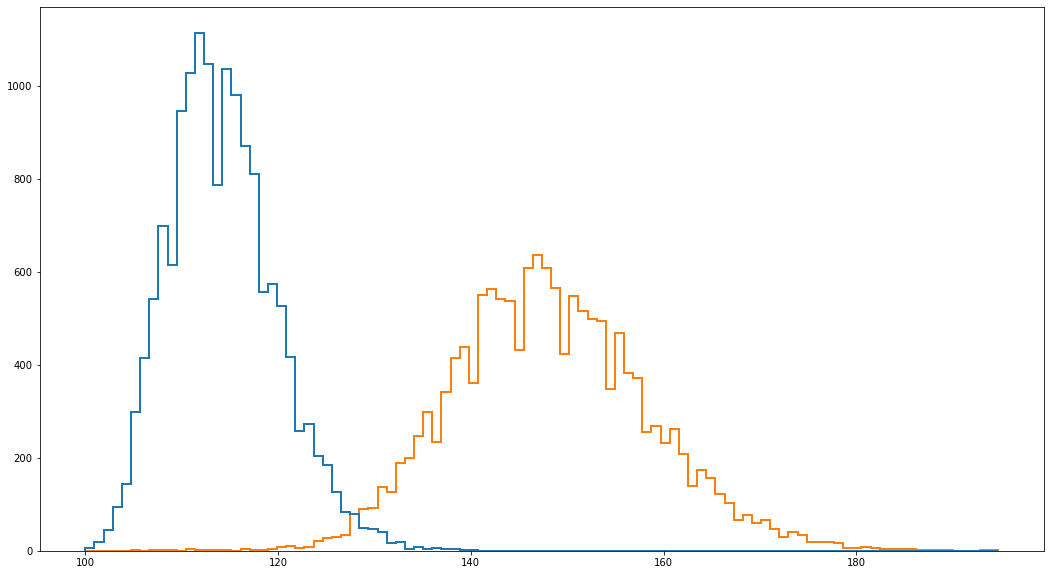

In [193]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal1, bins=100, histtype="step", linewidth=2)
plt.show()

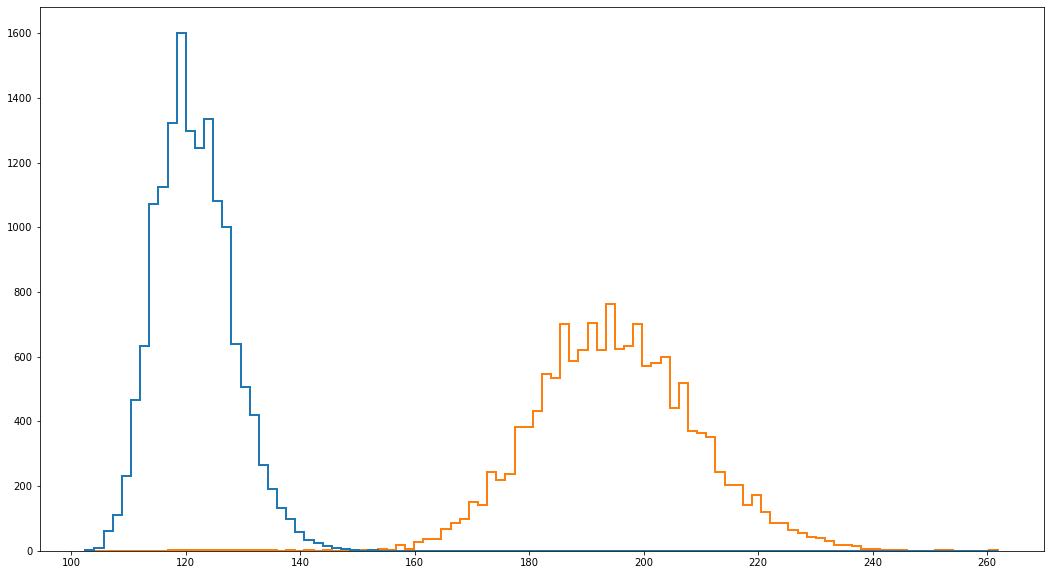

In [194]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal2, bins=100, histtype="step", linewidth=2)
plt.show()

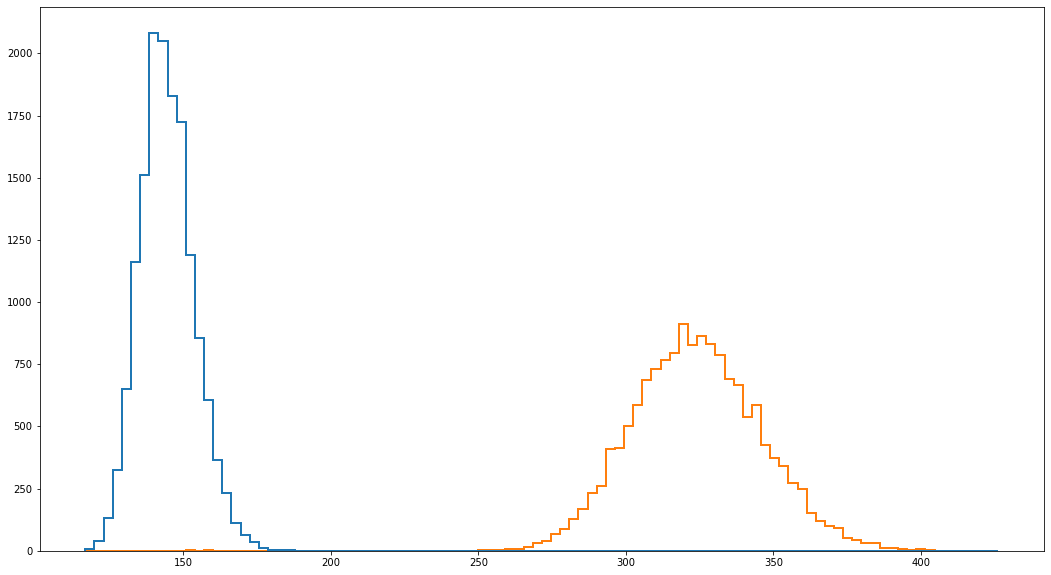

In [195]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal5, bins=100, histtype="step", linewidth=2)
plt.show()

### Defino dist de Poisson y factorial

In [196]:
def factorial(arr):
    salida = np.ones(arr.shape[0])
    for index, num in enumerate(arr):
        for i in range(1, num+1):
            salida[index] *= i
    return salida

def poisson_mio(datos, lmb):
    num =  np.exp(-lmb) * lmb**datos
    den = factorial(datos)
    return num/den



# Fitteamos Poisson a mano para la calibración 5

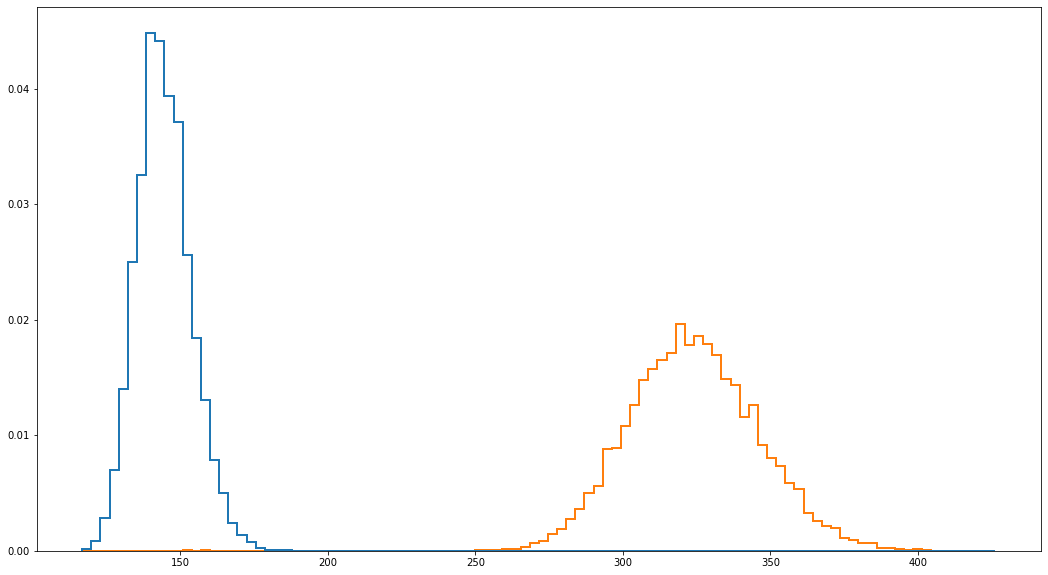

In [210]:
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(18,10))
(n0, n1), bins, patches = ax.hist(cal5, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

In [211]:
# print(bins)
# print(n0, n1)
# print(np.diff(bins))
# sum1 = 0
# sum2 = 0
# for i in range(len(n0)):
#     sum1 += n0[i]*np.diff(bins)[i]
#     sum2 += n1[i]*np.diff(bins)[i]
# escala_y = sum1

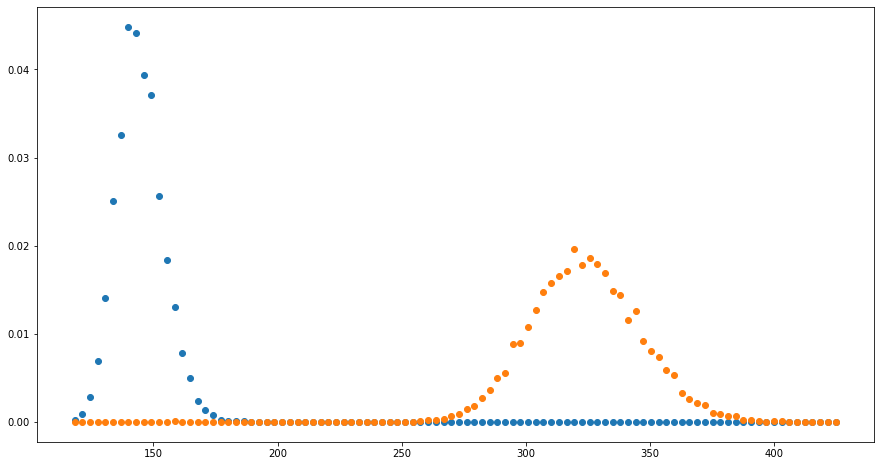

In [212]:
x = bins[:-1] + np.diff(bins)/2
y0 = n0
y1 = n1

fig, ax = plt.subplots(1, figsize=(15,8))
plt.plot(x, y0, 'o')
plt.plot(x, y1, 'o')
plt.show()

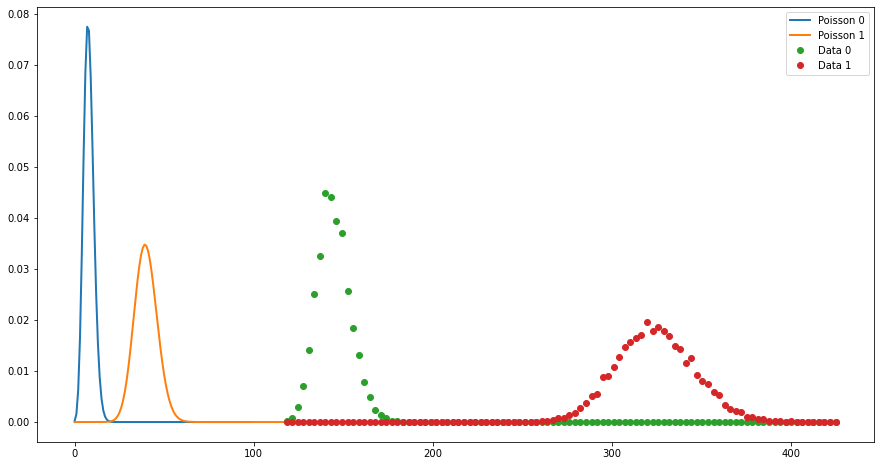

(7.916565121163161, 39.77784512116319)

In [213]:
#%matplotlib widget

scale_y = 1
# scale_x = 0.55
# offset = 100
scale_x = 1
offset = 0

mu05 = sum(((x-offset)*scale_x)*n0)
mu15 = sum(((x-offset)*scale_x)*n1)

# mu0 = sum(x*n0)
# mu1 = sum(x*n1)
# mu0 = 24
# mu1 = 124
x_poisson0 = np.arange(0, 100, 1, dtype=int)
x_poisson1 = np.arange(0, 150, 1, dtype=int)
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#offset = min(x)


fig, ax = plt.subplots(1, figsize=(15,8),facecolor = 'w')

ax.plot(x_poisson0, 0.55*poisson.pmf(x_poisson0, mu0), ms=8, label='Poisson 0', linewidth=2)
ax.plot(x_poisson1, 0.55*poisson.pmf(x_poisson1, mu1), ms=8, label="Poisson 1", linewidth=2)
ax.plot()

ax.plot((x-offset)*scale_x , y0/scale_y, 'o', label="Data 0")
ax.plot((x-offset)*scale_x, y1/scale_y, 'o', label="Data 1")

plt.legend()
#plt.savefig('calibracion5.png')
plt.show()
mu0, mu1

# Fitteamos Poisson a mano para la medición 2

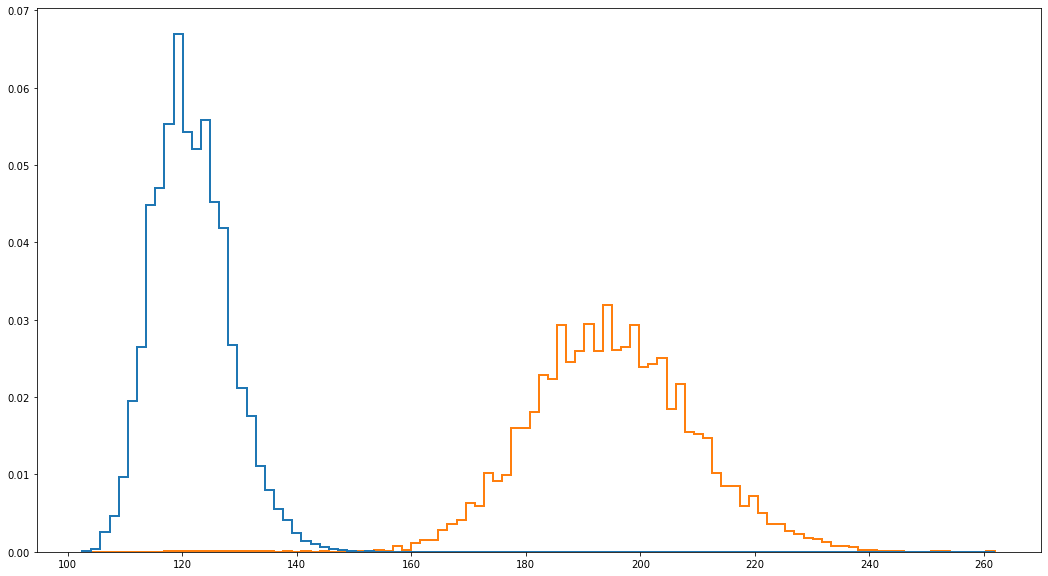

In [214]:
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(18,10))

(n0, n1), bins, patches = ax.hist(cal2, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

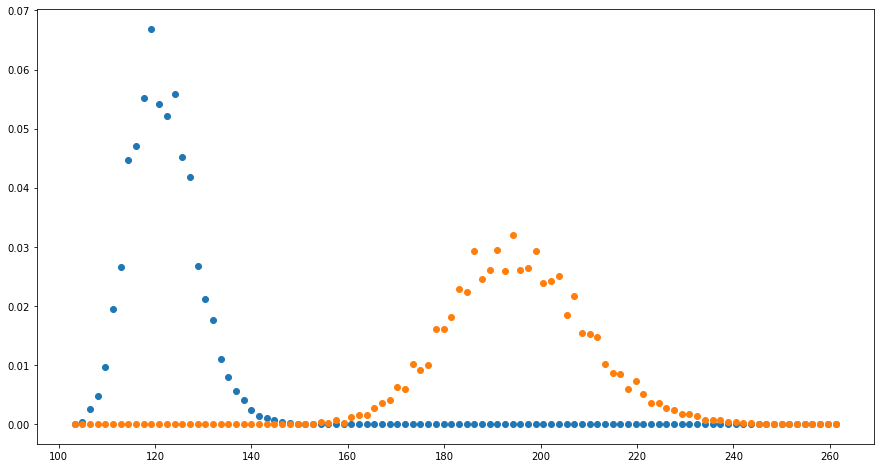

In [215]:
x = bins[:-1] + np.diff(bins)/2
y0 = n0
y1 = n1

fig, ax = plt.subplots(1, figsize=(15,8))
plt.plot(x, y0, 'o')
plt.plot(x, y1, 'o')
plt.show()

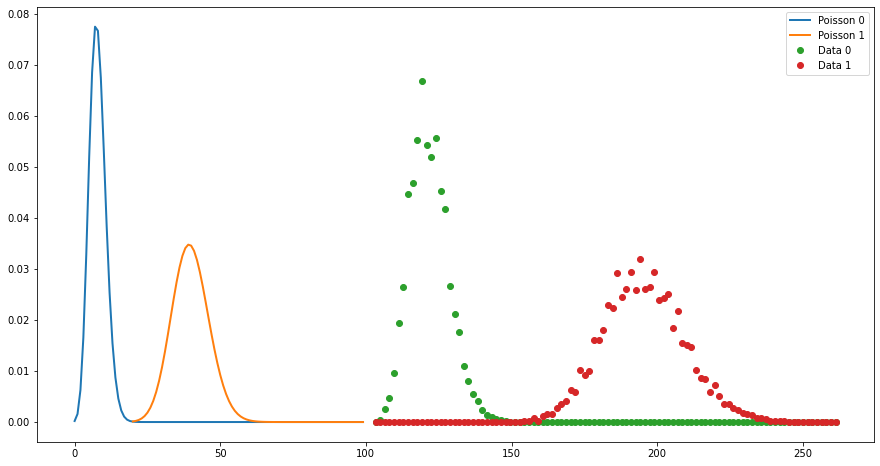

(7.916565121163161, 39.77784512116319)

In [216]:

escala_y =1
scale_y = 1
# scale_x = 0.55
# offset = 100
scale_x = 1
offset = 0


mu02 = sum(((x-offset)*scale_x)*n0)
mu12 = sum(((x-offset)*scale_x)*n1)

# mu0 = 12
# mu1 = 53
x_poisson0 = np.arange(0, 100, 1, dtype=int)
x_poisson1 = np.arange(20, 100, 1, dtype=int)
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#offset = min(x)-10
# sum1 = 0
# sum2 = 0
# for i in range(len(n0)):
#     sum1 += n0[i]*np.diff(bins)[i]
#     sum2 += n1[i]*np.diff(bins)[i]

#escala_y = sum1+sum2


fig, ax = plt.subplots(1, figsize=(15,8), facecolor ='white')

ax.plot(x_poisson0, 0.55*poisson.pmf(x_poisson0, mu0), ms=8, label='Poisson 0', linewidth=2)
ax.plot(x_poisson1, 0.55*poisson.pmf(x_poisson1, mu1), ms=8, label="Poisson 1", linewidth=2)

ax.plot((x-offset)*scale_x, y0, 'o', label="Data 0")
ax.plot((x-offset)*scale_x, y1, 'o', label="Data 1")

plt.legend()
#plt.savefig('calibracion2.png')
plt.show()
mu0,mu1

# Ajuste de calibración 1

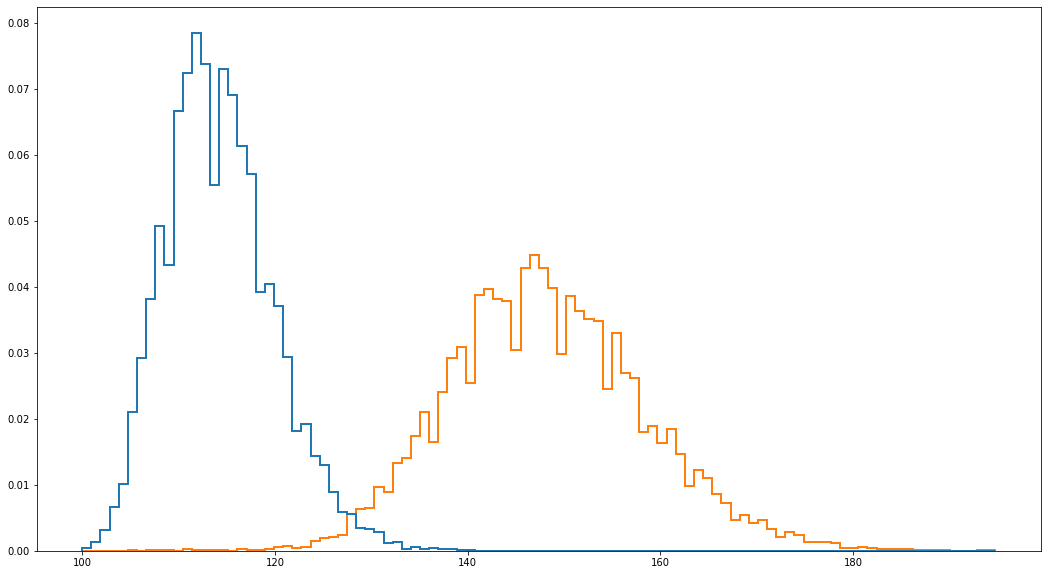

In [217]:
fig, ax = plt.subplots(1, figsize=(18,10))
(n0, n1), bins, patches = ax.hist(cal1, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

x = bins[:-1] + np.diff(bins)/2
y0 = n0
y1 = n1


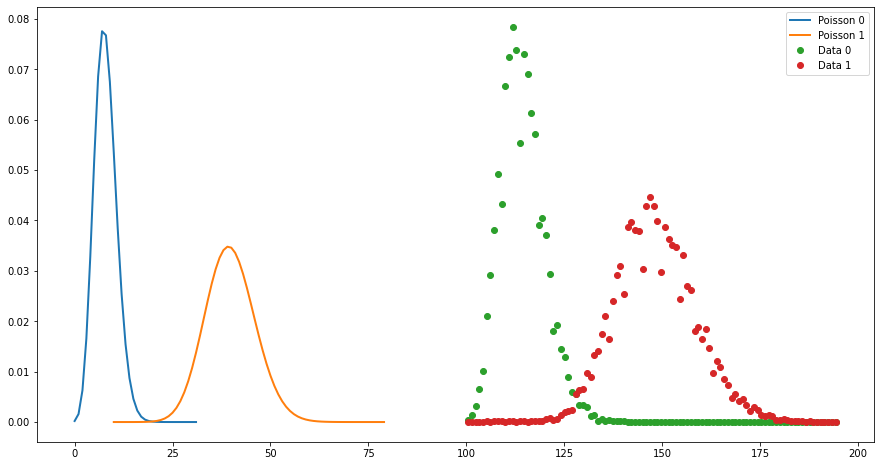

(7.916565121163161, 39.77784512116319)

In [218]:
escala_y = 1
scale_y = escala_y
# scale_x = 0.55
# offset = 100
scale_x = 1
offset = 0


mu01 = sum(((x-offset)*scale_x)*n0)
mu11 = sum(((x-offset)*scale_x)*n1)
# mu0 = 8
# mu1 = 26
x_poisson0 = np.arange(0, 32, 1, dtype=int)
x_poisson1 = np.arange(10, 80, 1, dtype=int)
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#offset = min(x)-10
sum1 = 0
sum2 = 0
for i in range(len(n0)):
    sum1 += n0[i]*np.diff(bins)[i]
    sum2 += n1[i]*np.diff(bins)[i]

#escala_y = sum1+sum2

fig, ax = plt.subplots(1, figsize=(15,8), facecolor ='white')

ax.plot(x_poisson0, 0.55*poisson.pmf(x_poisson0, mu0), ms=8, label='Poisson 0', linewidth=2)
ax.plot(x_poisson1, 0.55*poisson.pmf(x_poisson1, mu1), ms=8, label="Poisson 1", linewidth=2)

ax.plot((x-offset)*scale_x, y0, 'o', label="Data 0")
ax.plot((x-offset)*scale_x, y1, 'o', label="Data 1")

plt.legend()
#plt.savefig('calibracion2.png')
plt.show()
mu0, mu1

# Más pruebas tiempo de medicion y mu

In [241]:
%inline
fig, ax = plt.subplots(1, figsize=(18,10))
(n05, n15), bins, patches = ax.hist(cal5, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

x5 = bins[:-1] + np.diff(bins)/2
y05 = n05
y15 = n15

fig, ax = plt.subplots(1, figsize=(18,10))
(n02, n12), bins, patches = ax.hist(cal2, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

x2 = bins[:-1] + np.diff(bins)/2
y02 = n02
y12 = n12


fig, ax = plt.subplots(1, figsize=(18,10))
(n01, n11), bins, patches = ax.hist(cal1, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

x1 = bins[:-1] + np.diff(bins)/2
y01 = n01
y11 = n11

# mu01 = sum(((x-offset)*scale_x)*n01)
# mu11 = sum(((x-offset)*scale_x)*n11)

UsageError: Line magic function `%inline` not found.


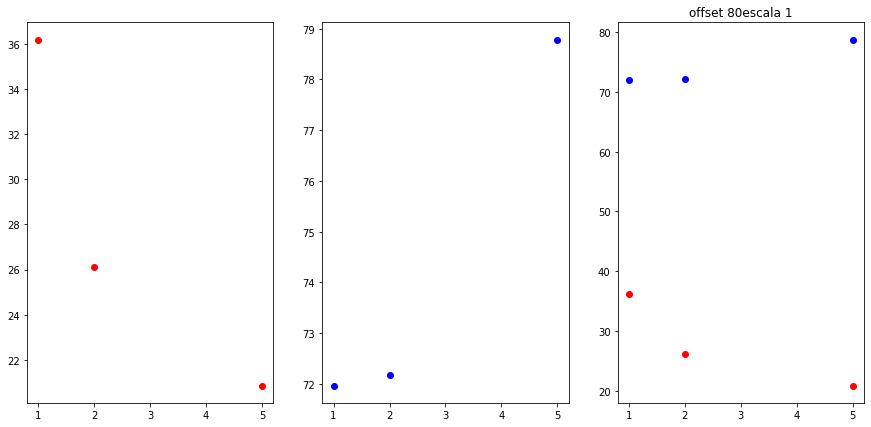

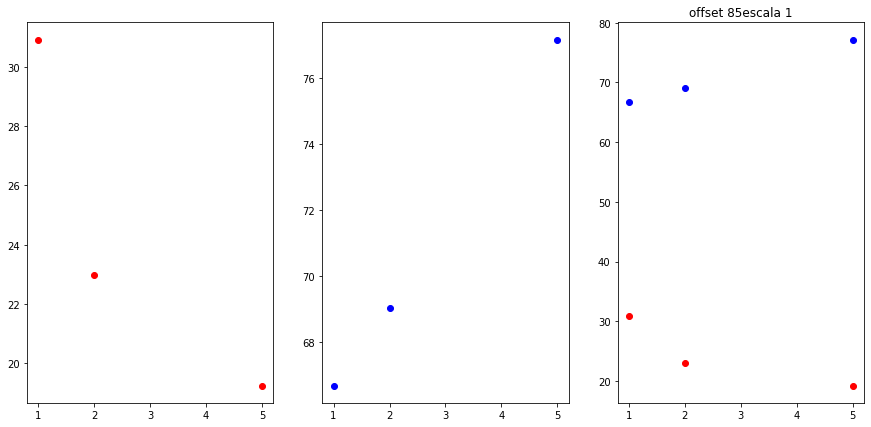

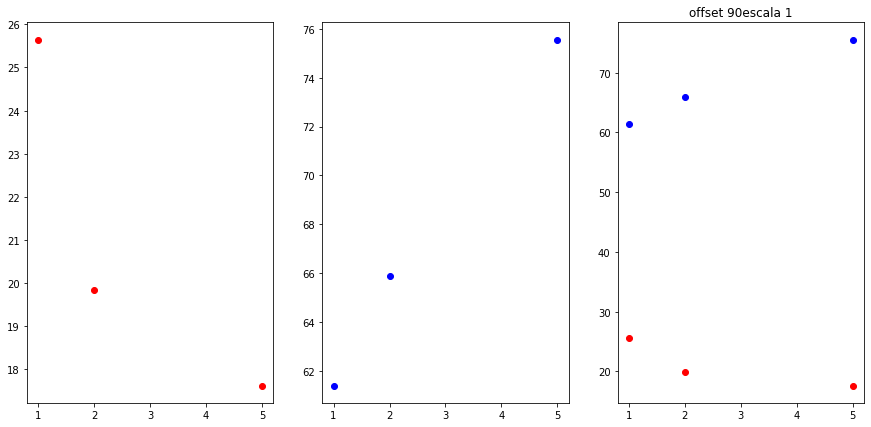

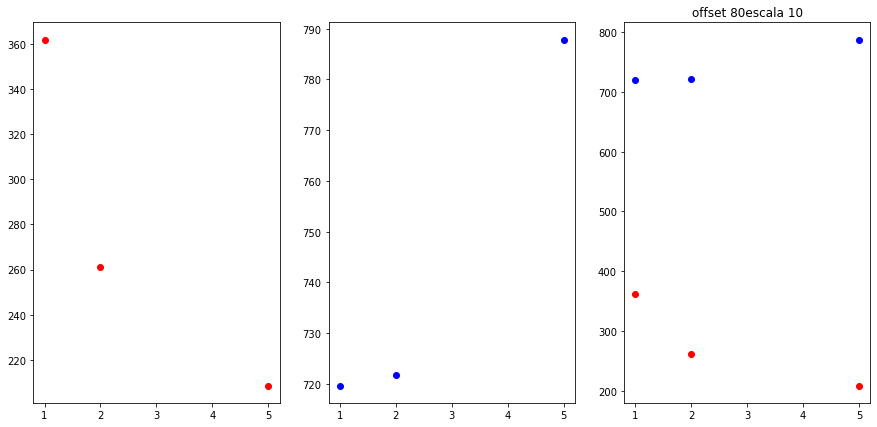

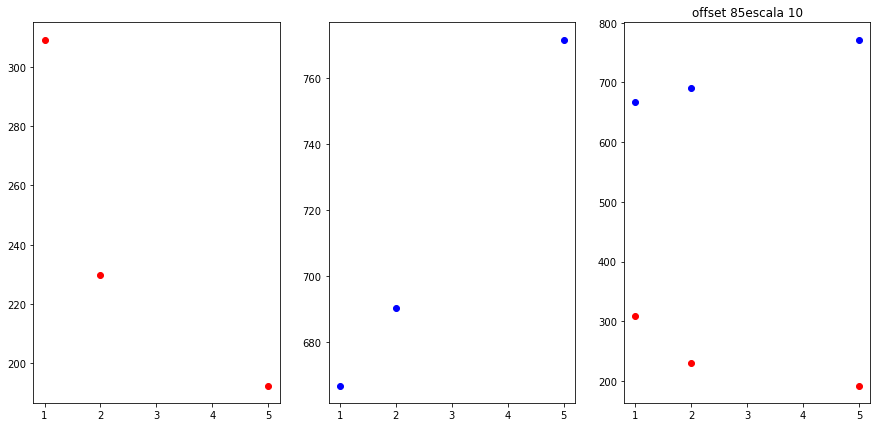

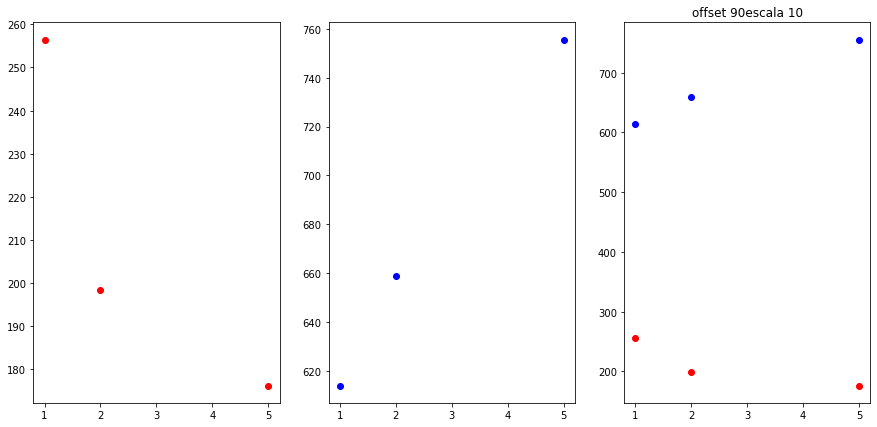

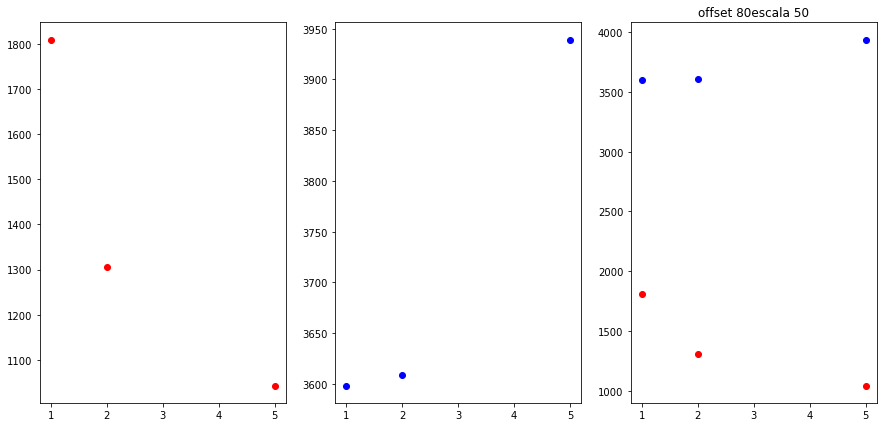

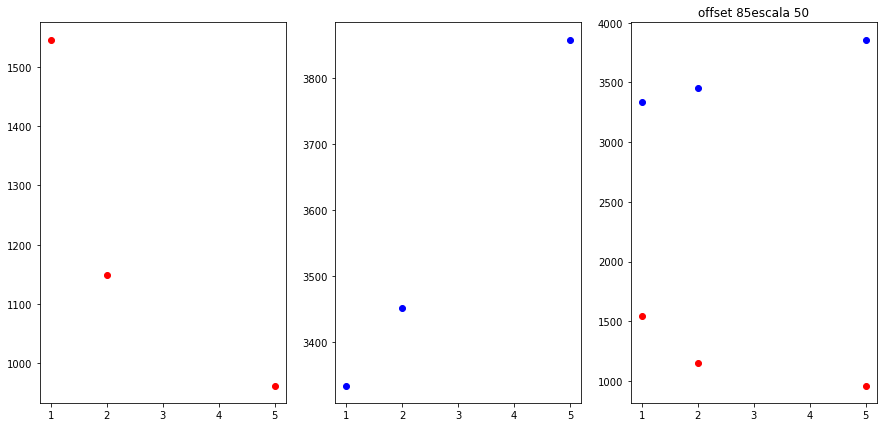

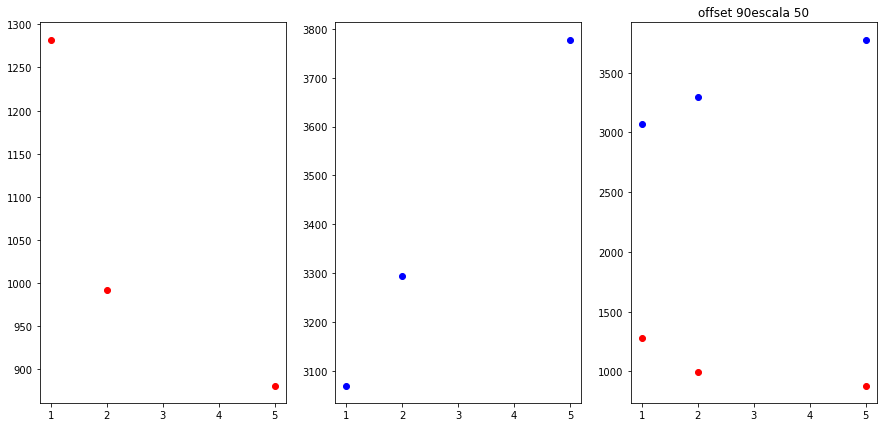

In [246]:
%matplotlib inline

x = [x1,x2,x5]
y0 = [y01, y02, y05]
y1 = [y11, y12, y15]
t = [1,2,5]
offset = [80, 85, 90]
x_scale = [0.55, 1, ]
for k in range(len(x_scale)):
    for j in range(len(offset)):
        mu0 = []
        mu1 = []
        for i in range(3):
            mu0.append(sum((x[i]-offset[j])*x_scale[k]*y0[i]))
            mu1.append(sum((x[i]-offset[j])*x_scale[k]*y1[i]))

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (15,7), facecolor = 'w')
        plt.title('offset '+str(offset[j])+'escala '+str(x_scale[k]))
        ax1.plot(t, mu0, 'or')
        ax2.plot(t, mu1, 'ob')
        ax3.plot(t, mu0, 'or')
        ax3.plot(t, mu1, 'ob')

35.766266666666624
46.05800000000001
57.92960000000006


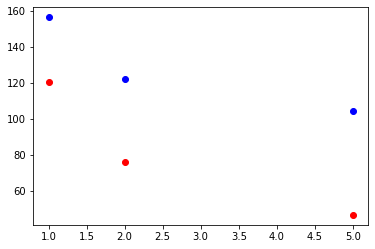

In [228]:
mus0 = [mu01, mu02, mu05]
mus1 = [mu11, mu12, mu15]
t = [1,2,5]

plt.figure(facecolor = 'w')
plt.plot(t, mus0, 'ro')
plt.plot(t, mus1, 'bo')
for i in range(len(mus0)):
    print(mus1[i]-mus0[i])

# Prueba a ver si sale

In [301]:
c1 = cal1.transpose()
c2 = cal2.transpose()
c5 = cal5.transpose()

gain = 0.55
offset = 1

x = bins[:-1] + np.diff(bins)/2

x = (x-offset)*gain
c5[0] = c5[0]/c5[0].sum()
c5[1] = c5[1]/c5[1].sum()

darkmean = (sum(x*c5[0]))
plt.step(x, c5[0]*gain)
plt.plot(x, poisson.pmf(x, darkmean), 'r')

brightmean= (sum(x*c5[1]))
plt.step(x, c5[1]*gain)
plt.plot(x_poisson, poisson.pmf(x_poisson, brightmean), 'b')


ValueError: operands could not be broadcast together with shapes (100,) (15000,) 